# Probaremos el grado de nivel de aprendisaje, este no deberia ser muy alto o pequeño
### hay que tomar en cuenta que el grado se encuentra entre 0.000001 y 0.99999
### probaremos entre intervalos de valores y el accuracy mas alto sera la prueba


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

## Nuevamente tomaremos 1000 imagenes como prueba de laboratorio

In [19]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('data/train/malignant','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('data/train/benign','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [20]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")

en total tenemos: 2637 imagenes dentro de la carpeta train


In [21]:
porcion1=dataTr[0:700]
porcion2=dataTr[701:1001]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de train")

para entrenamiento tendremos: 700 imagenes de la carpeta de train
para prueba tendremos: 300 imagenes de la carpeta de train


In [22]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [23]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

## Crearemos la convolucion y la RN

In [24]:
def creacion_modelo():
    modelo=Sequential()
    modelo.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
    modelo.add(MaxPooling2D(pool_size=((2,2))))
    modelo.add(Flatten())
    modelo.add(Dense(128,activation='relu'))
    modelo.add(Dense(50,activation='relu'))
    modelo.add(Dense(1,activation='sigmoid'))
    return modelo

In [25]:
def validacion(x_e,y_e,x_p,y_p,model,epocas):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    return a[1]

In [26]:
def evalucion(modelo,porcentaje,nombre,indice):
    prediccion=0
    epocas=1
    for i in range (11):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,i))*100
            if i==10:
                print("No se pudo encontrar el porcentaje adecuado en 10 epocas PASANDO A otro LR")
        else:
            print("************Para el metodo "+nombre+" se utilizo: "+str(i)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad con el indice LR= "+str(indice))
            break   

## ajustamos el learning read =lr para ADAM, pues es el metodo de desenso de gradiante mas optimo para nuestro caso

In [27]:
from tensorflow import keras

In [17]:
vector=[0.002,0.004,0.006,0.008,0.01]
vector2=[0.02,0.04,0.06,0.08,0.1]
vector3=[0.0002,0.0004,0.0006,0.0008,0.0009]

In [15]:
for i in (vector):
    modelo1=creacion_modelo()
    modelo_adam = keras.optimizers.Adam(learning_rate=i)
    modelo1.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
    evalucion(modelo1,70,"ADAM",i)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 17.2984 - acc: 0.4467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 6.7657 - acc: 0.6700
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 7s 10ms/sample - loss: 1.5079 - acc: 0.8014 - val_loss: 1.3649 - val_acc: 0.7600
Epoch 2/2
300/300 [==============================] - 1s 2ms/sample - loss: 1.2361 - acc: 0.7300
************Para el metodo ADAM se utilizo: 3 epocas para llegar a mas del 70% de acertividad con el indice LR= 0.002
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 9.0032 - acc: 0.5533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.6703 - acc: 0.4267
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [============

Epoch 7/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.6480 - acc: 0.5957 - val_loss: 0.6724 - val_acc: 0.5733
Epoch 8/8
300/300 [==============================] - 1s 2ms/sample - loss: 0.6704 - acc: 0.5767
Train on 700 samples, validate on 300 samples
Epoch 1/9
700/700 [==============================] - 7s 10ms/sample - loss: 0.6453 - acc: 0.5957 - val_loss: 0.6698 - val_acc: 0.5767
Epoch 2/9
700/700 [==============================] - 7s 10ms/sample - loss: 0.6458 - acc: 0.5957 - val_loss: 0.6698 - val_acc: 0.5767
Epoch 3/9
700/700 [==============================] - 7s 10ms/sample - loss: 0.6452 - acc: 0.5957 - val_loss: 0.6700 - val_acc: 0.5767
Epoch 4/9
700/700 [==============================] - 7s 10ms/sample - loss: 0.6444 - acc: 0.5957 - val_loss: 0.6705 - val_acc: 0.5767
Epoch 5/9
700/700 [==============================] - 7s 10ms/sample - loss: 0.6440 - acc: 0.5957 - val_loss: 0.6699 - val_acc: 0.5767
Epoch 6/9
700/700 [==============================] - 7

Epoch 2/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.1720 - acc: 0.9171 - val_loss: 8.3997 - val_acc: 0.6133
Epoch 3/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.2718 - acc: 0.9043 - val_loss: 8.3817 - val_acc: 0.6167
Epoch 4/8
700/700 [==============================] - 7s 10ms/sample - loss: 10.2879 - acc: 0.8500 - val_loss: 2.6634 - val_acc: 0.6333
Epoch 5/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.7364 - acc: 0.7857 - val_loss: 1.5431 - val_acc: 0.6267
Epoch 6/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.4841 - acc: 0.7871 - val_loss: 2.3257 - val_acc: 0.6400
Epoch 7/8
700/700 [==============================] - 7s 10ms/sample - loss: 0.3678 - acc: 0.8114 - val_loss: 3.1727 - val_acc: 0.6267
Epoch 8/8
300/300 [==============================] - 1s 2ms/sample - loss: 4.3967 - acc: 0.6433
Train on 700 samples, validate on 300 samples
Epoch 1/9
700/700 [==============================] - 

In [16]:
for i in (vector2):
    modelo1=creacion_modelo()
    modelo_adam = keras.optimizers.Adam(learning_rate=i)
    modelo1.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
    evalucion(modelo1,70,"ADAM",i)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 12.5130 - acc: 0.4500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6870 - acc: 0.5667
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 7s 10ms/sample - loss: 0.6885 - acc: 0.5486 - val_loss: 0.6870 - val_acc: 0.5533
Epoch 2/2
300/300 [==============================] - 1s 2ms/sample - loss: 0.6757 - acc: 0.5833
Train on 700 samples, validate on 300 samples
Epoch 1/3
700/700 [==============================] - 7s 10ms/sample - loss: 0.7025 - acc: 0.6000 - val_loss: 0.6800 - val_acc: 0.5633
Epoch 2/3
700/700 [==============================] - 7s 10ms/sample - loss: 0.6854 - acc: 0.5514 - val_loss: 0.6798 - val_acc: 0.5633
Epoch 3/3
300/300 [==============================] - 1s 2ms/sample - loss: 0.6794 - acc: 0.5633
Train on 700 samples, validate on 300 samples
Epo

Epoch 7/10
700/700 [==============================] - 7s 10ms/sample - loss: 0.6828 - acc: 0.5529 - val_loss: 0.6774 - val_acc: 0.5633
Epoch 8/10
700/700 [==============================] - 7s 10ms/sample - loss: 0.6820 - acc: 0.5529 - val_loss: 0.6775 - val_acc: 0.5633
Epoch 9/10
700/700 [==============================] - 7s 10ms/sample - loss: 0.6820 - acc: 0.5529 - val_loss: 0.6775 - val_acc: 0.5633
Epoch 10/10
300/300 [==============================] - 1s 2ms/sample - loss: 0.6775 - acc: 0.5633
No se pudo encontrar el porcentaje adecuado en 10 epocas PASANDO A otro LR
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 9.7061 - acc: 0.5533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6882 - acc: 0.5500
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 8s 11ms/sample - loss: 0.6910 - acc: 0.5457 - val_loss: 1.3

Epoch 2/10
700/700 [==============================] - 8s 11ms/sample - loss: 0.6800 - acc: 0.5557 - val_loss: 0.6774 - val_acc: 0.5633
Epoch 3/10
700/700 [==============================] - 8s 11ms/sample - loss: 0.6802 - acc: 0.5557 - val_loss: 0.6779 - val_acc: 0.5633
Epoch 4/10
700/700 [==============================] - 8s 11ms/sample - loss: 0.6804 - acc: 0.5557 - val_loss: 0.6776 - val_acc: 0.5633
Epoch 5/10
700/700 [==============================] - 8s 11ms/sample - loss: 0.6813 - acc: 0.5557 - val_loss: 0.6774 - val_acc: 0.5633
Epoch 6/10
700/700 [==============================] - 8s 11ms/sample - loss: 0.6802 - acc: 0.5557 - val_loss: 0.6775 - val_acc: 0.5633
Epoch 7/10
700/700 [==============================] - 8s 12ms/sample - loss: 0.6805 - acc: 0.5557 - val_loss: 0.6783 - val_acc: 0.5633
Epoch 8/10
700/700 [==============================] - 8s 12ms/sample - loss: 0.6821 - acc: 0.5557 - val_loss: 0.6777 - val_acc: 0.5633
Epoch 9/10
700/700 [==============================] - 8

700/700 [==============================] - 8s 12ms/sample - loss: 0.6900 - acc: 0.5443 - val_loss: 0.6884 - val_acc: 0.5500
Epoch 2/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6924 - acc: 0.5443 - val_loss: 0.6898 - val_acc: 0.5500
Epoch 3/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6905 - acc: 0.5443 - val_loss: 0.6881 - val_acc: 0.5500
Epoch 4/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6904 - acc: 0.5443 - val_loss: 0.6881 - val_acc: 0.5500
Epoch 5/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6926 - acc: 0.5443 - val_loss: 0.6887 - val_acc: 0.5500
Epoch 6/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6905 - acc: 0.5443 - val_loss: 0.6881 - val_acc: 0.5500
Epoch 7/9
700/700 [==============================] - 8s 12ms/sample - loss: 0.6914 - acc: 0.5443 - val_loss: 0.6883 - val_acc: 0.5500
Epoch 8/9
700/700 [==============================] - 8s 12ms/sample - lo

Epoch 5/8
700/700 [==============================] - 9s 13ms/sample - loss: 0.6949 - acc: 0.5443 - val_loss: 0.6887 - val_acc: 0.5500
Epoch 6/8
700/700 [==============================] - 9s 13ms/sample - loss: 0.6909 - acc: 0.5443 - val_loss: 0.6885 - val_acc: 0.5500
Epoch 7/8
700/700 [==============================] - 9s 13ms/sample - loss: 0.6923 - acc: 0.5443 - val_loss: 0.6902 - val_acc: 0.5500
Epoch 8/8
300/300 [==============================] - 1s 3ms/sample - loss: 0.6882 - acc: 0.5500
Train on 700 samples, validate on 300 samples
Epoch 1/9
700/700 [==============================] - 9s 13ms/sample - loss: 0.6911 - acc: 0.5443 - val_loss: 0.6885 - val_acc: 0.5500
Epoch 2/9
700/700 [==============================] - 9s 13ms/sample - loss: 0.6911 - acc: 0.5443 - val_loss: 0.6887 - val_acc: 0.5500
Epoch 3/9
700/700 [==============================] - 9s 13ms/sample - loss: 0.6933 - acc: 0.5443 - val_loss: 0.6929 - val_acc: 0.5500
Epoch 4/9
700/700 [==============================] - 9

In [18]:
for i in (vector3):
    modelo1=creacion_modelo()
    modelo_adam = keras.optimizers.Adam(learning_rate=i)
    modelo1.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
    evalucion(modelo1,70,"ADAM",i)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 4.4301 - acc: 0.4600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 63.9668 - acc: 0.6300
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [==============================] - 8s 12ms/sample - loss: 48.8190 - acc: 0.7143 - val_loss: 25.7789 - val_acc: 0.7267
Epoch 2/2
300/300 [==============================] - 1s 2ms/sample - loss: 10.8375 - acc: 0.7400
************Para el metodo ADAM se utilizo: 3 epocas para llegar a mas del 70% de acertividad con el indice LR= 0.0002
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 43.7190 - acc: 0.4500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 125.0189 - acc: 0.6333
Train on 700 samples, validate on 300 samples
Epoch 1/2
700/700 [=====

## Para Graficar los candidatos

In [28]:
vector_candidatos=[0.0008,0.0009,0.001,0.002,0.003,0.004]

In [29]:
def evaluacion_candidatos(modelo,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break  

In [30]:
def validacion_candidatos(x_e,y_e,x_p,y_p,model,epocas):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    return a[1]

In [31]:
v_ca1=[]
v_ce1=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce1,v_ca1)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 37.5147 - acc: 0.7633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 21.1857 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 8.8940 - acc: 0.7633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.4680 - acc: 0.7967
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.8214 - acc: 0.7900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.0305 - acc: 0.7767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.1547 - acc: 0.7767
Train on 700 samples, validate on 300 samples
300/300 [===================

In [32]:
v_ca2=[]
v_ce2=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.0009)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce2,v_ca2)

ERROR! Session/line number was not unique in database. History logging moved to new session 818
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 188.4281 - acc: 0.5533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 63.8864 - acc: 0.5900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 23.3306 - acc: 0.7833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 11.7240 - acc: 0.7767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 9.2650 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 11.0451 - acc: 0.7533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - l

In [33]:
v_ca3=[]
v_ce3=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.001)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce3,v_ca3)

ERROR! Session/line number was not unique in database. History logging moved to new session 819
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 90.8352 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 25.3321 - acc: 0.7867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 19.0662 - acc: 0.7300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.9336 - acc: 0.8167
==> Para el metodo ADAM se utilizo: 4 epocas para llegar a mas del 80% de acertividad


In [ ]:
v_ca4=[]
v_ce4=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.002)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce4,v_ca4)

ERROR! Session/line number was not unique in database. History logging moved to new session 826
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 5ms/sample - loss: 12.2069 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1.8521 - acc: 0.7500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 5ms/sample - loss: 2.4284 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 8.6433 - acc: 0.5833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 5ms/sample - loss: 0.9228 - acc: 0.7367
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1.8796 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\254955899.py", line 6, in <module>
    evaluacion_candidatos(modelo_final,80,"ADAM",v_ce4,v_ca4)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\1294313218.py", line 6, in evaluacion_candidatos
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\2902134277.py", line 2, in validacion
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.p

In [ ]:
v_ca5=[]
v_ce5=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.003)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce5,v_ca5)

ERROR! Session/line number was not unique in database. History logging moved to new session 825
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1.0512 - acc: 0.6700
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 0.7152 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 0.9493 - acc: 0.6900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 0.9159 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1.1001 - acc: 0.6933
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1.8034 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 2s 5ms/sample - loss: 1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\2693169880.py", line 6, in <module>
    evaluacion_candidatos(modelo_final,80,"ADAM",v_ce5,v_ca5)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\1294313218.py", line 6, in evaluacion_candidatos
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\2902134277.py", line 2, in validacion
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.

In [ ]:
v_ca6=[]
v_ce6=[]
modelo_final=creacion_modelo()
modelo_adam = keras.optimizers.Adam(learning_rate=0.004)
modelo_final.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
evaluacion_candidatos(modelo_final,80,"ADAM",v_ce6,v_ca6)

ERROR! Session/line number was not unique in database. History logging moved to new session 823
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0.8386 - acc: 0.7500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0.8134 - acc: 0.6967
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 1.1036 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0.8017 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0.8494 - acc: 0.7267
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0.8513 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 0

300/300 [==============================] - 1s 4ms/sample - loss: 2.0394 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 2.1128 - acc: 0.7267
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 1.7622 - acc: 0.7200
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 4ms/sample - loss: 2.1149 - acc: 0.7067
Train on 700 samples, validate on 300 samples
224/700 [========>.....................] - ETA: 6s - loss: 0.3154 - acc: 0.8661

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\1233012558.py", line 6, in <module>
    evaluacion_candidatos(modelo_final,80,"ADAM",v_ce6,v_ca6)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\1294313218.py", line 6, in evaluacion_candidatos
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14476\2902134277.py", line 2, in validacion
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.

In [35]:
%matplotlib inline
import matplotlib.pyplot as mp

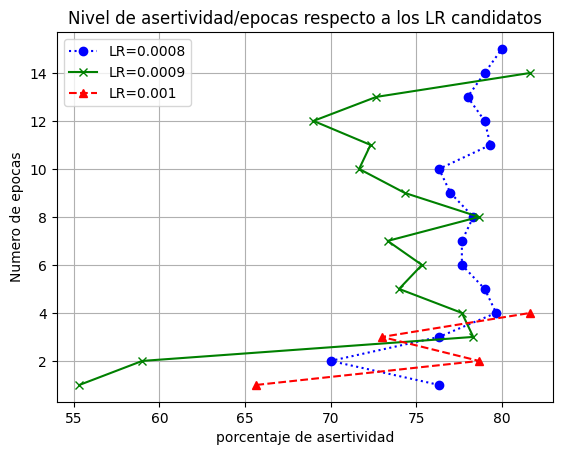

In [41]:
mp.plot(v_ca1,v_ce1, marker='o', linestyle=':', color='b', label = "LR=0.0008")
mp.plot(v_ca2,v_ce2, marker='x', linestyle='-', color='g', label = "LR=0.0009")
mp.plot(v_ca3,v_ce3, marker='^', linestyle='--', color='r', label = "LR=0.001")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad/epocas respecto a los LR candidatos")
mp.grid(True)
mp.show()

In [44]:
print("asertividad del LR=0.0008: "+str(round(v_ca1[-1],1))+"% alcanzado en: "+str(v_ce1[-1])+ " epocas.")
print("asertividad del LR=0.0008: "+str(round(v_ca2[-1],1))+"% alcanzado en: "+str(v_ce2[-1])+ " epocas.")
print("asertividad del LR=0.0008: "+str(round(v_ca3[-1],1))+"% alcanzado en: "+str(v_ce3[-1])+ " epocas.")

asertividad del LR=0.0008: 80.0% alcanzado en: 15 epocas.
asertividad del LR=0.0008: 81.7% alcanzado en: 14 epocas.
asertividad del LR=0.0008: 81.7% alcanzado en: 4 epocas.
